## 2-layer NN : XOR Problem

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Step 1. Data -  target : 0, 1 binary

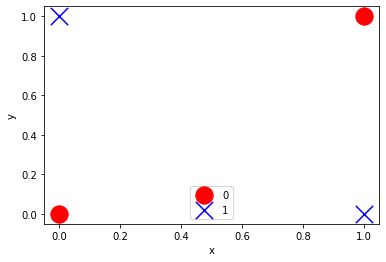

In [2]:
x_data = np.array([[0., 0.],
          [0., 1.],
          [1., 0.],
          [1., 1.]])
y_data = np.array([[0.],
          [1.],
          [1.],
          [0.]])

plt.scatter(x_data[0, 0], x_data[0, 1], s=300, color='red', marker='o')
plt.scatter(x_data[3, 0], x_data[3, 1], s=300, color='red', marker='o', label='0')
plt.scatter(x_data[1, 0], x_data[1, 1], s=300, color='blue', marker='x')
plt.scatter(x_data[2, 0], x_data[2, 1], s=300, color='blue', marker='x', label='1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower center')
plt.show()

### Step 2. 2-Layer NN Model (input = 2, hidden1 = 4, output = 1 with softmax function)

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


### Step 3. Loss,Optimizer, Metric

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

### Step 4. Train the model

In [5]:
history = model.fit(x_data, y_data, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 466ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 11/2000
1/

### Step 5. Test the Model

In [6]:
print(model.predict_classes(x_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0]
 [1]
 [1]
 [0]]


In [7]:
score = model.evaluate(x_data, y_data, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2569166123867035
Test accuracy: 1.0


### Plot the Training loss

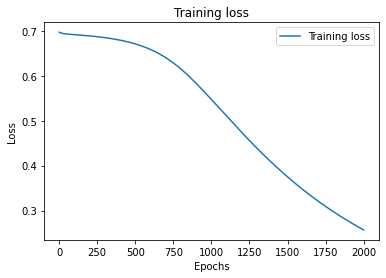

In [8]:
history_dict = history.history
#print(history_dict.keys())

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, '-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plot the Training Accuracy

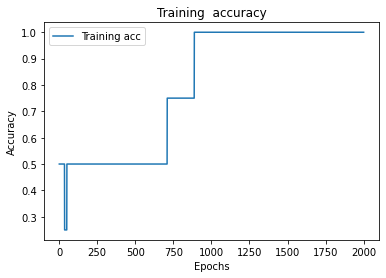

In [9]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']

plt.plot(epochs, acc, '-', label='Training acc')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Plot the Decision Boundary

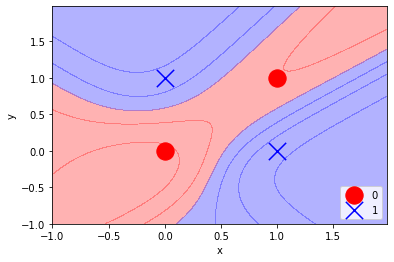

In [10]:
plt.scatter(x_data[0, 0], x_data[0, 1], s=300, color='red', marker='o', label='0')
plt.scatter(x_data[3, 0], x_data[3, 1], s=300, color='red', marker='o')
plt.scatter(x_data[1, 0], x_data[1, 1], s=300, color='blue', marker='x', label='1')
plt.scatter(x_data[2, 0], x_data[2, 1], s=300, color='blue', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

resolution=0.02
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
x1_min, x1_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
x2_min, x2_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.show()